In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler
import math

pd.options.display.max_columns = 999
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
train = pd.read_csv('training.csv')
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
del(train['EventId'])
y = train['Label']
Weight = train['Weight']
del(train['Label'])
del(train['Weight'])
X = train

Fraction of 's' :  0.342668


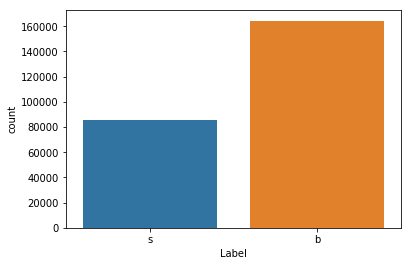

In [4]:
#Checking if the data is balanced
sns.countplot(y)
print "Fraction of 's' : ",float(sum(y=='s'))/len(y)

Clearly the data is imbalanced (34-66 distribution)

In [5]:
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [6]:
#Filling in -999.00(Marker for empty feilds) values with median of the rest of the data in the column

imp = Imputer(missing_values=-999.00, strategy='median')
cols = X.columns
X = pd.DataFrame(imp.fit_transform(X), columns=cols)
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.193104,268.220619,-0.411629,2.373100,18.917332,158.432217,1.437609,-0.128305,0.455245,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,50.739149,-0.010535,-0.001879,73.064591
std,52.859218,35.344886,40.828691,63.655682,0.948104,224.229668,1.948520,0.782911,22.273494,115.706115,0.844743,1.193585,0.214768,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,17.792135,1.094446,0.978743,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,95.665000,19.241000,59.388750,14.068750,2.107000,225.885000,-0.244000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.454000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,47.902000,-0.010000,-0.002000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,2.107000,225.885000,-0.244000,2.961000,27.591000,200.478250,1.777000,1.225000,0.454000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,47.902000,-0.010000,-0.002000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


### Analysing outliers

In [7]:
X.describe(percentiles=[0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.991, 0.992, 0.995, 0.996, 0.999, 0.9995, 0.9999])

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.193104,268.220619,-0.411629,2.373100,18.917332,158.432217,1.437609,-0.128305,0.455245,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,50.739149,-0.010535,-0.001879,73.064591
std,52.859218,35.344886,40.828691,63.655682,0.948104,224.229668,1.948520,0.782911,22.273494,115.706115,0.844743,1.193585,0.214768,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,17.792135,1.094446,0.978743,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
70%,124.963300,68.731300,87.635000,67.917300,2.107000,225.885000,-0.244000,2.879000,25.506000,179.673000,1.651000,1.098000,0.454000,41.548000,0.694000,1.246000,50.082000,0.750000,1.310000,47.670300,1.241000,241.992200,1.000000,65.593300,0.001000,-0.031000,47.902000,-0.010000,-0.002000,91.820300
80%,137.205200,78.597000,97.734200,93.363000,2.107000,225.885000,-0.244000,3.040000,30.316200,225.560200,1.929000,1.314000,0.454000,49.187400,1.123000,1.890000,57.436200,1.193000,1.918000,57.109000,1.877000,289.598400,2.000000,87.425200,0.872000,1.031000,47.902000,-0.010000,-0.002000,131.707200
85%,146.005150,84.238150,104.979000,111.648000,2.107000,225.885000,-0.244000,3.113000,35.402000,257.802900,2.123000,1.370000,0.454000,54.749000,1.392000,2.206000,62.794000,1.468000,2.223000,64.545150,2.191000,322.486900,2.000000,103.368150,1.337000,1.563000,47.902000,-0.010000,-0.002000,159.115300
90%,160.890000,91.624200,117.101200,137.912300,3.035000,355.584800,0.328000,3.207000,43.578100,303.682300,2.391000,1.400000,0.761000,62.950000,1.691000,2.522000,70.985100,1.752000,2.525000,76.094100,2.507000,369.675000,2.000000,126.909100,1.862000,2.092000,57.708100,0.963000,0.980000,197.453900
95%,201.808000,104.644200,149.270050,183.491100,4.276000,631.186000,1.767000,3.441000,56.689150,383.002400,2.897000,1.412000,0.945000,77.882450,2.011000,2.830000,86.647100,2.066000,2.838000,99.891000,2.823000,449.873200,3.000000,169.457200,2.559000,2.617000,77.286050,2.152000,2.060000,263.951550


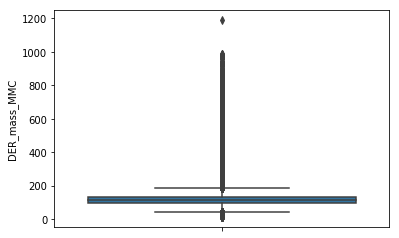

In [8]:
sns.boxplot(y = X['DER_mass_MMC'])

In [9]:
y[X['DER_mass_MMC']>=889].value_counts()

b    23
s     3
Name: Label, dtype: int64

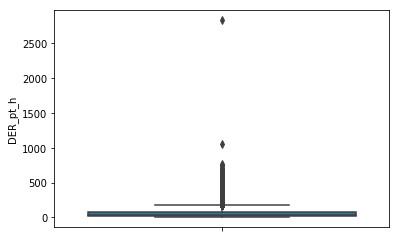

In [10]:
sns.boxplot(y = X['DER_pt_h'])

In [11]:
y[X['DER_pt_h']>=596].value_counts()

s    19
b     7
Name: Label, dtype: int64

In [12]:
X.describe(percentiles=[0.99, 0.991, 0.992, 0.995, 0.996, 0.999, 0.9995, 0.9999])

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.193104,268.220619,-0.411629,2.373100,18.917332,158.432217,1.437609,-0.128305,0.455245,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,50.739149,-0.010535,-0.001879,73.064591
std,52.859218,35.344886,40.828691,63.655682,0.948104,224.229668,1.948520,0.782911,22.273494,115.706115,0.844743,1.193585,0.214768,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,17.792135,1.094446,0.978743,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
99%,339.844050,144.514090,243.416070,295.453100,5.882010,1356.116320,5.610010,4.153000,98.065130,587.714010,4.443000,1.414000,0.998000,125.456030,2.358000,3.081000,131.580110,2.364000,3.083000,167.146100,3.079000,653.884370,3.000000,280.731030,3.491000,3.033000,129.570080,3.469000,2.925000,432.087770
99.1%,350.210963,147.985180,251.220009,302.786387,5.956000,1408.280341,5.876000,4.201000,101.158387,602.776351,4.558000,1.414000,0.998000,129.171009,2.368000,3.087000,134.946162,2.373000,3.090000,172.106090,3.085000,667.567414,3.000000,289.186000,3.533000,3.043000,133.655234,3.523009,2.947000,443.556126
99.2%,362.637560,151.900216,258.671072,311.329064,6.045000,1463.748344,6.118000,4.255000,104.872064,619.669040,4.684000,1.414000,0.999000,133.925120,2.377000,3.092000,139.034280,2.382000,3.096000,178.101048,3.091000,682.027856,3.000000,298.446272,3.574000,3.056000,138.156136,3.572000,2.968000,456.218304
99.5%,412.656020,170.711105,290.143370,345.802005,6.358000,1687.339520,7.173000,4.457005,120.382165,682.026200,5.247010,1.414000,0.999000,151.513055,2.409000,3.109000,154.417235,2.408000,3.112000,200.417085,3.110000,744.858055,3.000000,334.251850,3.761000,3.088000,157.219190,3.770005,3.032000,511.065330
99.6%,434.348324,179.817188,304.414256,361.584024,6.489000,1774.617300,7.645000,4.535000,127.388112,714.129156,5.520000,1.414000,1.000000,160.991148,2.421000,3.115000,161.758084,2.418000,3.117000,211.504008,3.116000,774.193068,3.000000,350.737908,3.836000,3.098000,166.261636,3.856004,3.054000,538.254016


In [13]:
#Points above the 99.99 percentile are considered as outlier
y = y[ X['DER_mass_MMC']<=890 ]
y = y[ X['DER_mass_vis']<=665 ]
y = y[ X['DER_pt_h']<=597 ]
y = y[ X['DER_mass_jet_jet']<=3334 ]
y = y[ X['DER_pt_tot']<=274 ]
y = y[ X['DER_sum_pt']<=1246 ]
y = y[ X['PRI_tau_pt']<=350 ]
y = y[ X['PRI_lep_pt']<=336 ]
y = y[ X['PRI_met']<=416 ]
y = y[ X['PRI_met_sumet']<=1316 ]
y = y[ X['PRI_jet_leading_pt']<=618 ]
y = y[ X['PRI_jet_subleading_pt']<=385 ]
y = y[ X['PRI_jet_all_pt']<=1099 ]

Weight = Weight[ X['DER_mass_MMC']<=890 ]
Weight = Weight[ X['DER_mass_vis']<=665 ]
Weight = Weight[ X['DER_pt_h']<=597 ]
Weight = Weight[ X['DER_mass_jet_jet']<=3334 ]
Weight = Weight[ X['DER_pt_tot']<=274 ]
Weight = Weight[ X['DER_sum_pt']<=1246 ]
Weight = Weight[ X['PRI_tau_pt']<=350 ]
Weight = Weight[ X['PRI_lep_pt']<=336 ]
Weight = Weight[ X['PRI_met']<=416 ]
Weight = Weight[ X['PRI_met_sumet']<=1316 ]
Weight = Weight[ X['PRI_jet_leading_pt']<=618 ]
Weight = Weight[ X['PRI_jet_subleading_pt']<=385 ]
Weight = Weight[ X['PRI_jet_all_pt']<=1099 ]

X = X[ X['DER_mass_MMC']<=890 ]
X = X[ X['DER_mass_vis']<=665 ]
X = X[ X['DER_pt_h']<=597 ]
X = X[ X['DER_mass_jet_jet']<=3334 ]
X = X[ X['DER_pt_tot']<=274 ]
X = X[ X['DER_sum_pt']<=1246 ]
X = X[ X['PRI_tau_pt']<=350 ]
X = X[ X['PRI_lep_pt']<=336 ]
X = X[ X['PRI_met']<=416 ]
X = X[ X['PRI_met_sumet']<=1316 ]
X = X[ X['PRI_jet_leading_pt']<=618 ]
X = X[ X['PRI_jet_subleading_pt']<=385 ]
X = X[ X['PRI_jet_all_pt']<=1099 ]

In [14]:
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000
mean,120.297204,49.208626,81.075247,57.688387,2.192989,267.620263,-0.410570,2.373521,18.853498,157.885865,1.436641,-0.128891,0.455306,38.636603,-0.010983,-0.008105,46.595808,-0.019489,0.043392,41.600697,-0.010182,209.302707,0.978106,76.888924,-0.001849,-0.020557,50.655092,-0.010585,-0.002048,72.653455
std,51.972573,35.147266,39.921504,62.767813,0.946532,220.967078,1.944655,0.782017,21.250520,113.716442,0.836257,1.193583,0.214591,21.962678,1.214072,1.816795,21.700527,1.265068,1.816538,31.910220,1.812259,124.839436,0.976855,46.859940,1.382497,1.404774,17.044852,1.093559,0.977951,96.415752
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.082000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,-0.000000
25%,95.658000,19.249000,59.393000,14.024000,2.107000,225.885000,-0.244000,1.811000,2.839000,77.524000,0.883000,-1.371000,0.454000,24.589000,-0.925000,-1.575000,32.372000,-1.014000,-1.523000,21.386000,-1.575000,122.973000,0.000000,57.410000,-0.432000,-0.555000,47.902000,-0.010000,-0.002000,0.000000
50%,112.406000,46.527000,73.750000,38.437000,2.107000,225.885000,-0.244000,2.492000,12.292000,120.568000,1.280000,-0.359000,0.454000,31.796000,-0.023000,-0.033000,40.508000,-0.045000,0.086000,34.788000,-0.024000,179.635000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.452000
75%,130.595000,73.587000,92.242000,79.045000,2.107000,225.885000,-0.244000,2.961000,27.579000,200.194000,1.777000,1.225000,0.454000,44.999000,0.898000,1.565000,53.365000,0.959000,1.618000,51.846000,1.561000,263.135000,2.000000,75.212000,0.432000,0.502000,47.902000,-0.010000,-0.002000,109.704000
max,889.698000,570.115000,664.854000,596.067000,8.503000,3333.822000,16.690000,5.684000,273.421000,1242.706000,15.677000,1.414000,1.000000,349.588000,2.497000,3.142000,335.588000,2.503000,3.142000,415.625000,3.142000,1315.289000,3.000000,613.415000,4.499000,3.141000,384.815000,4.500000,3.142000,1092.209000


In [15]:
#Since the values are still large in many of the columns, we aplly log to columns with all positive values
cols = X.columns
X = np.array(X)
log_cols = [0, 1, 2, 3, 5, 8, 9, 10, 12, 13, 16, 19, 21, 22, 23, 26, 29]
X[:, log_cols] = np.log(1 + X[:, log_cols])
X = pd.DataFrame(X, columns=cols)
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000,249789.000000
mean,4.733318,3.555713,4.318895,3.401570,2.192989,5.437623,-0.410570,2.373521,2.398142,4.872053,0.843052,-0.128891,0.363986,3.578890,-0.010983,-0.008105,3.789496,-0.019489,0.043392,3.515796,-0.010182,5.190589,0.558801,4.243065,-0.001849,-0.020557,3.913574,-0.010585,-0.002048,2.725681
std,0.350283,1.007721,0.413730,1.357051,0.946532,0.509813,1.944655,0.782017,1.170911,0.603112,0.298318,1.193583,0.151919,0.417037,1.214072,1.816795,0.359127,1.265068,1.816538,0.713307,1.812259,0.568689,0.499671,0.437034,1.382497,1.404774,0.223133,1.093559,0.977951,2.292841
min,2.306975,0.000000,1.991839,0.000000,0.000000,2.681159,-18.066000,0.208000,0.000000,3.852358,0.078811,-1.414000,0.000000,3.044522,-2.499000,-3.142000,3.295837,-2.505000,-3.142000,0.103459,-3.142000,2.686350,0.000000,3.433987,-4.499000,-3.142000,3.433987,-4.500000,-3.142000,0.000000
25%,4.571179,3.008105,4.100873,2.709649,2.107000,5.424443,-0.244000,1.811000,1.345212,4.363404,0.632866,-1.371000,0.374318,3.242163,-0.925000,-1.575000,3.507717,-1.014000,-1.523000,3.108436,-1.575000,4.820064,0.000000,4.067487,-0.432000,-0.555000,3.889818,-0.010000,-0.002000,0.000000
50%,4.730974,3.861298,4.314149,3.674704,2.107000,5.424443,-0.244000,2.492000,2.587162,4.800474,0.824175,-0.359000,0.374318,3.490307,-0.023000,-0.033000,3.725886,-0.045000,0.086000,3.577613,-0.024000,5.196478,0.693147,4.198119,0.000000,-0.033000,3.889818,-0.010000,-0.002000,3.724536
75%,4.879729,4.311966,4.535198,4.382589,2.107000,5.424443,-0.244000,2.961000,3.352672,5.304270,1.021371,1.225000,0.374318,3.828620,0.898000,1.565000,3.995721,0.959000,1.618000,3.967382,1.561000,5.576460,1.098612,4.333519,0.432000,0.502000,3.889818,-0.010000,-0.002000,4.706860
max,6.792005,6.347591,6.501070,6.392029,8.503000,8.112175,16.690000,5.684000,5.614663,7.125851,2.814031,1.414000,0.693147,5.859612,2.497000,3.142000,5.818860,2.503000,3.142000,6.032187,3.142000,7.182572,1.386294,6.420671,4.499000,3.141000,5.955358,4.500000,3.142000,6.996873


In [16]:
#Some features still have a high deviation. Hence scaling all the features

scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=cols)
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05,2.497890e+05
mean,-1.763400e-15,6.836928e-17,-3.577063e-15,4.733936e-16,2.382044e-16,-1.687002e-15,-6.937911e-17,6.531706e-16,-1.430962e-16,-1.344345e-16,2.557981e-16,7.063072e-17,-4.801637e-16,2.974853e-16,-1.291436e-17,2.446332e-17,-9.065081e-16,1.080937e-17,-5.177121e-18,-1.640180e-15,1.820526e-18,8.567850e-16,-1.133277e-16,-4.816287e-16,-4.337972e-18,-9.159521e-18,5.293577e-15,-6.115829e-17,-1.237958e-16,-2.188045e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-6.926829e+00,-3.528477e+00,-5.624586e+00,-2.506595e+00,-2.316871e+00,-5.406827e+00,-9.078972e+00,-2.769155e+00,-2.048104e+00,-1.690725e+00,-2.561835e+00,-1.076684e+00,-2.395934e+00,-1.281346e+00,-2.049320e+00,-1.724961e+00,-1.374612e+00,-1.964730e+00,-1.753555e+00,-4.783839e+00,-1.728133e+00,-4.403537e+00,-1.118339e+00,-1.851298e+00,-3.252925e+00,-2.222030e+00,-2.149340e+00,-4.105333e+00,-3.210753e+00,-1.188782e+00
25%,-4.628805e-01,-5.434129e-01,-5.269668e-01,-5.098723e-01,-9.084634e-02,-2.585197e-02,8.565552e-02,-7.193225e-01,-8.992417e-01,-8.433747e-01,-7.045704e-01,-1.040658e+00,6.800953e-02,-8.074296e-01,-7.528536e-01,-8.624517e-01,-7.846229e-01,-7.861344e-01,-8.622971e-01,-5.710883e-01,-8.634643e-01,-6.515444e-01,-1.118339e+00,-4.017494e-01,-3.111410e-01,-3.804486e-01,-1.064663e-01,5.349093e-04,4.883723e-05,-1.188782e+00
50%,-6.689762e-03,3.032443e-01,-1.147031e-02,2.012710e-01,-9.084634e-02,-2.585197e-02,8.565552e-02,1.515045e-01,1.614309e-01,-1.186829e-01,-6.327705e-02,-1.927886e-01,6.800953e-02,-2.124115e-01,-9.897713e-03,-1.370272e-02,-1.771230e-01,-2.016598e-02,2.345559e-02,8.666223e-02,-7.624677e-03,1.035532e-02,2.688699e-01,-1.028433e-01,1.337649e-03,-8.857788e-03,-1.064663e-01,5.349093e-04,4.883723e-05,4.356415e-01
75%,4.179818e-01,7.504605e-01,5.228140e-01,7.229066e-01,-9.084634e-02,-2.585197e-02,8.565552e-02,7.512370e-01,8.152052e-01,7.166459e-01,5.977488e-01,1.134311e+00,6.800953e-02,5.988208e-01,7.487080e-01,8.658698e-01,5.742413e-01,7.734690e-01,8.668199e-01,6.330894e-01,8.669761e-01,6.785279e-01,1.080335e+00,2.069736e-01,3.138163e-01,3.719872e-01,-1.064663e-01,5.349093e-04,4.883723e-05,8.640733e-01
max,5.877233e+00,2.770492e+00,5.274405e+00,2.203650e+00,6.666464e+00,5.246154e+00,8.793645e+00,4.233266e+00,2.747031e+00,3.736955e+00,6.606976e+00,1.292658e+00,2.166694e+00,5.468885e+00,2.065766e+00,1.733883e+00,5.650843e+00,1.993959e+00,1.705780e+00,3.527789e+00,1.739370e+00,3.502766e+00,1.656079e+00,4.982708e+00,3.255601e+00,2.250585e+00,9.150553e+00,4.124692e+00,3.214941e+00,1.862842e+00


In [17]:
#Functions to calculate ams score
def ams(s, b):
    return math.sqrt(2 * ((s + b + 10) * math.log(1.0 + s/(b + 10)) - s))

def get_ams_score(W, Y, Y_pred):
    s = W * (Y == 1) * (Y_pred == 1)
    b = W * (Y == 0) * (Y_pred == 1)
    s = np.sum(s)
    b = np.sum(b)
    return ams(s, b)

In [18]:
X = np.array(X)
y = np.array(y)
y = np.array(y=='s', dtype=int)
Weight = np.array(Weight)

train_X = X[:220000 , :]
train_y = y[:220000]
train_Weight = Weight[:220000]

val_X = X[220000:, :]
val_y = y[220000:]
val_Weight = Weight[220000:]

In [19]:
print train_X.shape
print train_y.shape
print train_Weight.shape

print val_X.shape
print val_y.shape
print val_Weight.shape

(220000, 30)
(220000,)
(220000,)
(29789, 30)
(29789,)
(29789,)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier


In [22]:
params = {
    'n_estimators' : [300, 400, 500],
    'max_features' : [20, 25, 30],
    'max_depth' : [10, 12, 15],
    'min_samples_split' : [50, 100, 150],
    'min_samples_leaf' : [50, 100, 150]
}

#etc = GridSearchCV(ExtraTreesClassifier(), params, verbose=True, n_jobs=-1)
etc = ExtraTreesClassifier(class_weight='balanced', n_estimators = 400, max_features = 25, max_depth = 12, min_samples_leaf = 100, min_samples_split = 100, n_jobs = -1)
etc.fit(train_X, train_y)
#print etc.best_params_


val_y_pred = etc.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.14410355503  at threshold of  86


In [23]:
params = {
    'max_depth' : [10, 12, 15],
    'min_samples_split' : [50, 100, 150],
    'min_samples_leaf' : [50, 100, 150],
    'max_features' : ['sqrt', 'log2', None]
}

#dtc = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), params, verbose=True, n_jobs=-1)
dtc = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=100, max_depth=12, class_weight='balanced')
dtc.fit(train_X, train_y)
#print dtc.best_params_


val_y_pred = dtc.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.03396508611  at threshold of  78


In [28]:
params = {
    'n_neighbors' : [3, 5, 7]
}

#knn = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(train_X, train_y)
#print knn.best_params_

val_y_pred = knn.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]


Best asm score of  0.838333610699  at threshold of  77


In [29]:
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']
}

#lr = GridSearchCV(LogisticRegression(), params, verbose=True, n_jobs=-1)
lr = LogisticRegression(solver='newton-cg')
lr.fit(train_X, train_y)
#print lr.best_params_


val_y_pred = lr.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]



Best asm score of  0.609836723764  at threshold of  75


In [31]:
gnb = GaussianNB()
gnb.fit(train_X, train_y)



val_y_pred = gnb.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]



Best asm score of  0.369122065603  at threshold of  75


In [32]:
mlp1 = MLPClassifier(hidden_layer_sizes=(20, 100, 20), early_stopping=True)
mlp1.fit(train_X, train_y)



val_y_pred = mlp1.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.18135266872  at threshold of  86


In [35]:
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 100, 100, 20), early_stopping=True)
mlp2.fit(train_X, train_y)



val_y_pred = mlp2.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.1364523237  at threshold of  86


In [36]:
mlp3 = MLPClassifier(hidden_layer_sizes=(50, 100, 100, 50), early_stopping=True)
mlp3.fit(train_X, train_y)



val_y_pred = mlp3.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.1543993403  at threshold of  82


In [37]:
mlp4 = MLPClassifier(hidden_layer_sizes=(50, 100, 50), early_stopping=True)
mlp4.fit(train_X, train_y)



val_y_pred = mlp4.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.16236787787  at threshold of  85


In [44]:
ada_etc = AdaBoostClassifier(n_estimators=30, learning_rate=0.1, base_estimator=etc)
ada_etc.fit(train_X, train_y, sample_weight=train_Weight)


val_y_pred = ada_etc.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.22680118216  at threshold of  87


In [45]:
ada_dtc = AdaBoostClassifier(n_estimators=30, learning_rate=0.1, base_estimator=dtc)
ada_dtc.fit(train_X, train_y, sample_weight=train_Weight)


val_y_pred = ada_dtc.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.19651229312  at threshold of  84


In [59]:
vc = VotingClassifier(estimators=[('ada_etc' , ada_etc), ('ada_dtc' , ada_dtc), ('mlp1' , mlp1), ('mlp2' , mlp2), ('mlp3' , mlp3), ('mlp4' , mlp4)], voting='soft', weights=[1,0.8,0.5,0.5,0.5,0.5], n_jobs=-1)
vc.fit(train_X, train_y)

val_y_pred = vc.predict_proba(val_X)[:,1]

thresholds = np.arange(75,95)
asm_scores = []

for threshold in thresholds:
    limit = np.percentile(val_y_pred, threshold)
    val_y_thesholded = val_y_pred > limit
    score = get_ams_score(val_Weight, val_y, val_y_thesholded)
    asm_scores.append(score)
    
print "Best asm score of ",max(asm_scores)," at threshold of ",thresholds[np.argmax(asm_scores)]

Best asm score of  1.23380751886  at threshold of  84
